In [1]:
import pandas as pd
from folium.plugins import MarkerCluster
from pymongo import MongoClient
import folium
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Create instance of MongoClient
mongo = MongoClient(port=27017)

In [6]:
# Assign database to variable
db = mongo['Bridges']
collection2 = db['PhillyBridges']
data2 = collection2.find()
bridge_df = pd.DataFrame(list(data2))
bridge_df

,_id,Bridge_ID,Latitude,Longitude,Year_Built,Bridge_Condition,Average Daily_Traffic,Deck_Width,Structure_Length,SqFt,Repair_Cost_Est,Replacement_Cost_Est,Address
0,66252a9b53c092ad819b9915,452997,40.103450,-74.961092,1990,Good,9729,13.0,18.3,237.90,"$74,700.60","$109,852.70","Dunksferry Road, Mechanicsville, 19020"
1,66252a9b53c092ad819b9916,466574,40.017092,-75.211428,1928,Fair,14596,19.2,32.9,631.68,"$198,347.52","$291,684.56","Ridge Avenue, Wissahickon, 19127"
2,66252a9b53c092ad819b9917,466580,39.963467,-75.186778,1964,Poor,27042,16.1,167.0,2688.70,"$844,251.80","$1,241,534.11","Spring Garden Street, Mantua, 19104"
3,66252a9b53c092ad819b9918,466581,39.963861,-75.185025,1964,Poor,27042,16.2,27.1,439.02,"$137,852.28","$202,721.88","2917, Spring Garden Street, Mantua, 19104"
4,66252a9b53c092ad819b9919,466617,40.035356,-75.208878,1957,Fair,28301,20.7,115.2,2384.64,"$748,776.96","$1,101,131.37","Henry Avenue, 19127"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,66252a9b53c092ad819b99ae,471580,39.958900,-75.170372,2017,Good,8800,19.8,29.9,592.02,"$185,894.28","$273,371.16","North 19th Street, Center City, 19132"
154,66252a9b53c092ad819b99af,471996,39.959400,-75.173906,2018,Good,13020,20.4,39.0,795.60,"$249,818.40","$367,376.26","Vine Street Expressway, Center City, 19103"
155,66252a9b53c092ad819b99b0,471998,39.959500,-75.175500,2018,Good,12400,25.5,32.9,838.95,"$263,430.30","$387,393.55","North 22nd Street, Center City, 19103"
156,66252a9b53c092ad819b99b1,472287,39.960194,-75.159694,1892,Poor,150,4.8,17.1,82.08,"$25,773.12","$37,901.26","Noble Street, Chinatown, Center City, 19123"


In [7]:
#Filter the data frame to get the traffic volume and coordinates for only the poor condition bridges
poor_traffic = bridge_df.loc[bridge_df["Bridge_Condition"] == "Poor", ["Latitude", "Longitude", "Bridge_Condition", "Average Daily_Traffic"]]
poor_traffic

,Latitude,Longitude,Bridge_Condition,Average Daily_Traffic
2,39.963467,-75.186778,Poor,27042
3,39.963861,-75.185025,Poor,27042
5,40.005244,-75.131928,Poor,14600
8,39.993506,-75.128647,Poor,3200
9,40.018283,-75.135900,Poor,1500
10,40.014492,-75.178256,Poor,10000
15,40.016050,-75.175225,Poor,13600
25,40.012064,-75.194331,Poor,1000
29,40.012808,-75.117725,Poor,21000
41,39.954000,-75.183597,Poor,8500


In [8]:
priority_df = bridge_df.loc[(bridge_df["Average Daily_Traffic"] >= 10000) & (bridge_df["Bridge_Condition"] == "Poor"), ["Bridge_ID", "Latitude", "Longitude", "Bridge_Condition", "Average Daily_Traffic", "Repair_Cost_Est", "Replacement_Cost_Est","Address"]] 

# Remove the currency symbol ($) and commas from column 'A' and convert to integers
priority_df['Repair_Cost_Est'] = priority_df['Repair_Cost_Est'].str.replace(',', '').str.replace('$', '').astype(float)
priority_df['Replacement_Cost_Est'] = priority_df['Replacement_Cost_Est'].str.replace(',', '').str.replace('$', '').astype(float)

priority_df

,Bridge_ID,Latitude,Longitude,Bridge_Condition,Average Daily_Traffic,Repair_Cost_Est,Replacement_Cost_Est,Address
2,466580,39.963467,-75.186778,Poor,27042,844251.80,1241534.11,"Spring Garden Street, Mantua, 19104"
3,466581,39.963861,-75.185025,Poor,27042,137852.28,202721.88,"2917, Spring Garden Street, Mantua, 19104"
5,466638,40.005244,-75.131928,Poor,14600,152274.30,223930.51,"North 2nd Street, Chopersville, 19140"
10,466643,40.014492,-75.178256,Poor,10000,202062.14,297147.18,"Roosevelt Expressway, East Falls, 19129"
15,466648,40.016050,-75.175225,Poor,13600,156296.64,229845.66,"West Abbottsford Avenue, Abbotsford Homes, 19129"
29,466663,40.012808,-75.117725,Poor,21000,131880.00,193939.20,"401, East Hunting Park Avenue, Juniata, 19124"
42,466677,40.007742,-75.197811,Poor,18650,677062.50,995670.00,"Falls Bridge, East Falls, 19129"
48,466683,40.031056,-75.111125,Poor,11000,258108.00,379566.72,"Tabor Road, Cedar Grove, 19120"
53,466688,39.922869,-75.219564,Poor,20000,170323.02,250472.48,"South 61st Street, Elmwood Park, 19142"
70,466705,40.090203,-75.069367,Poor,10700,145495.04,213961.11,"Pine Road, 19115"


In [9]:
# Create map of Philadelphia
myMap = folium.Map(location = (39.952583, -75.165222), tiles = "OpenStreetMap", zoom_start = 10)
myMap

In [10]:
# Add another tile layer for visualization
folium.TileLayer("cartodbpositron").add_to(myMap)

In [11]:
# Create a function to assign differnet colors dependant on the amount of ADT on each bridge
def get_circle_color(value):
    if value <= 5000:
        return 'green'
    elif value >= 5001 and value < 10000:
        return 'orange'
    else:
        return 'red'

In [12]:
# Create a function to assign different colors for the three different condition grades    
condition = bridge_df["Bridge_Condition"]
def get_marker_color(condition):
    if condition == "Good":
        return "green"
    elif condition == "Fair":
        return "orange" 
    else:
        return "darkred"

In [13]:
# Create a group for the traffic volume cirlces
traffic_volume = folium.FeatureGroup(name = "Traffic Volume", show=False ) 

# Add circles to the map for each poor condition bridge reflecting their traffic volume
for index, row in poor_traffic.iterrows():
    # Get the value for the circle color from the ADT column
    value = row["Average Daily_Traffic"]
    # Determine the color based on the value ranges
    color = get_circle_color(value)
    # Add a circle to the map with the determined color
    marker = folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]], 
        color=color,
        fill_color=color,
        fill_opacity=0.7,
        radius=10).add_to(traffic_volume)

# Create separate groups for each marker type
good_group = folium.FeatureGroup(name="Good Condition")
fair_group = folium.FeatureGroup(name="Fair Condition")
poor_group = folium.FeatureGroup(name="Poor Condition")

# Create a group for the priority bridge markers
priority_bridges = folium.FeatureGroup(name = "Priority Bridges", show=False )

# Create Markers
for index, row in bridge_df.iterrows():
    ID = row["Bridge_ID"]
    lat = row["Latitude"]
    long = row["Longitude"]
    condition = row["Bridge_Condition"]
    address = row["Address"]
    avg_daily_traffic = row["Average Daily_Traffic"]
    repair_cost = row["Repair_Cost_Est"]
    replace_cost = row["Replacement_Cost_Est"]
    #Marker Coloring
    marker_color = get_marker_color(condition)
    text = f"ID: {ID} <br>Address: {address} <br>Latitude: {lat} <br>Longitude: {long} <br> Condition: {condition} <br> Average Daily Traffic: {avg_daily_traffic} <br> Estimated Cost to Repair: {repair_cost} <br> Estimated Cost to Replace: {replace_cost}"
    popup = folium.Popup(text, max_width = 300)
    marker = folium.Marker([lat, long], popup=popup, icon=folium.Icon(color=marker_color))
    
    if condition == "Good":
        marker.add_to(good_group)
    elif condition == "Fair":
        marker.add_to(fair_group)
    elif condition == "Poor":
        marker.add_to(poor_group)
    else:
        marker.add_to(myMap)

# Create Priority Markers
for index, row in priority_df.iterrows():
    ID = row["Bridge_ID"]
    lat = row["Latitude"]
    long = row["Longitude"]
    condition = row["Bridge_Condition"]
    address = row["Address"]
    avg_daily_traffic = row["Average Daily_Traffic"]
    repair_cost = row["Repair_Cost_Est"]
    replace_cost = row["Replacement_Cost_Est"]
    # Marker Coloring
    marker_color = get_marker_color(condition)
    text = f"ID: {ID} <br>Address: {address} <br>Latitude: {lat} <br>Longitude: {long} <br> Condition: {condition} <br> Average Daily Traffic: {avg_daily_traffic} <br> Estimated Cost to Repair: {repair_cost} <br> Estimated Cost to Replace: {replace_cost}"
    popup = folium.Popup(text, max_width = 300)
    Pmarker = folium.Marker([lat, long], popup=popup, icon=folium.Icon(color="darkred")).add_to(priority_bridges)
    
    # Add a circle to the map with the determined color
    PCmarker = folium.CircleMarker(
        location=[row["Latitude"], row["Longitude"]], 
        color="red",
        fill_color="red",
        fill_opacity=0.7,
        radius=10).add_to(priority_bridges)

# Add all layers to the map
good_group.add_to(myMap)
fair_group.add_to(myMap)
poor_group.add_to(myMap)
traffic_volume.add_to(myMap)
priority_bridges.add_to(myMap)

folium.LayerControl().add_to(myMap)


# Create legend for traffic data
legend_html = '''
    <div style="position: fixed;
                    bottom: 30px; left: 30px; width: 100px; height: 200px;
                    border:5pm black; z-index: 9999; font-size:10px;
                    background-color: white;
                    ">
                    
                    <p style="margin-bottom: 5px;"><strong>Traffic Volume</strong><p>
                    <p style="margin-left: 10px;"><i class ="fa fa-circle" style="color: green;"></i>&nbsp;0 - 5,000</p>
                    <p style="margin-left: 10px;"><i class ="fa fa-circle" style="color: orange;"></i>&nbsp;5,001 - 9,999</p>
                    <p style="margin-left: 10px;"><i class ="fa fa-circle" style="color: red;"></i>&nbsp;10,000+</p>
                                        
                    <p style="margin-bottom: 5px;"><strong>Bridge Markers</strong><p>
                    <p style="margin-left: 10px;"><i class ="fa fa-map-marker" style="color: green;"></i>&nbsp;Good Condition</p>
                    <p style="margin-left: 10px;"><i class ="fa fa-map-marker" style="color: orange;"></i>&nbsp;Fair Condition</p>
                    <p style="margin-left: 10px;"><i class ="fa fa-map-marker" style="color: red;"></i>&nbsp;Poor Condition</p>
    </div>
'''
# Add legend to map 
myMap.get_root().html.add_child(folium.Element(legend_html))

# Display map
myMap

In [14]:
# Create function to turn amount into currency format
def format_currency(amount):
    return '${:,.2f}'.format(amount)

In [15]:
# Find sum of repair costs for poor bridges with high traffic
sum_repair = priority_df['Repair_Cost_Est'].sum()
format_currency(sum_repair)

'$4,243,882.70'

In [16]:
# Find sum of replacement costs for poor bridges with high traffic
sum_replace = priority_df['Replacement_Cost_Est'].sum()
format_currency(sum_replace)

'$6,240,940.38'

In [17]:
# Find average of repair costs for poor bridges with high traffic
avg_repair = priority_df['Repair_Cost_Est'].mean()
format_currency(avg_repair)

'$282,925.51'

In [18]:
# Find average of replacement costs for poor bridges with high traffic
avg_replace = priority_df['Replacement_Cost_Est'].mean()
format_currency(avg_replace)

'$416,062.69'

In [19]:
# Calculate difference between sum
difference = sum_replace - sum_repair
difference

1997057.6800000006

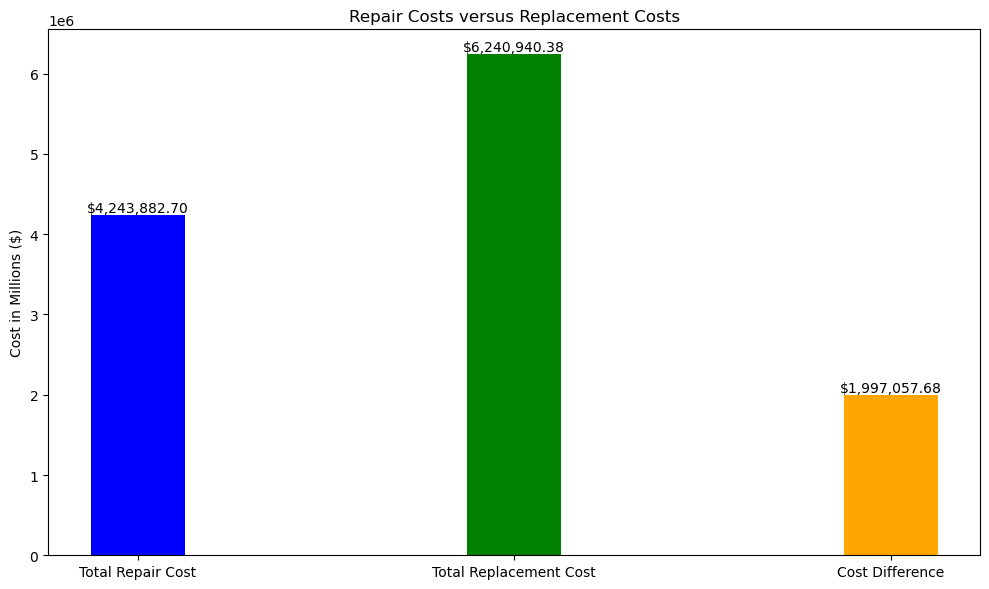

In [20]:
# Create bar of costs and difference
labels = ['Total Repair Cost', 'Total Replacement Cost', 'Cost Difference']
values = [sum_repair, sum_replace, difference]
x_pos = np.arange(len(labels))
plt.figure(figsize=(10,6))
bars = plt.bar(labels, values, color=['blue', 'green', 'orange'], width=0.25)
plt.title('Repair Costs versus Replacement Costs')
plt.ylabel('Cost in Millions ($)')
for bar, value in zip(bars, values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), format_currency(value),
             ha='center', va='bottom', color='black', fontsize=10)
plt.xticks(x_pos, labels, rotation=0)
plt.tight_layout()
plt.show()